In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy as sp
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from scipy.signal import detrend

In [17]:
birth_df = pd.read_csv('Daily_Birth.csv')
birth_df.head()

,Date,Num_Births
0,1977-01-01,208
1,1977-01-02,241
2,1977-01-03,274
3,1977-01-04,256
4,1977-01-05,294


In [18]:
birth_df = birth_df.dropna()

In [19]:
birth_df['Date'] = pd.to_datetime(birth_df['Date'], format='%Y-%m-%d')
birth_df['Month'] = birth_df['Date'].dt.month
birth_df['Year'] = birth_df['Date'].dt.year
birth_df.head()

,Date,Num_Births,Month,Year
0,1977-01-01,208,1,1977
1,1977-01-02,241,1,1977
2,1977-01-03,274,1,1977
3,1977-01-04,256,1,1977
4,1977-01-05,294,1,1977


In [20]:
birth_per_month = birth_df.groupby(['Year', 'Month'])['Num_Births'].sum().reset_index()
birth_per_month.head()

,Year,Month,Num_Births
0,1977,1,8000
1,1977,2,7446
2,1977,3,8682
3,1977,4,8477
4,1977,5,8683


In [22]:
birth_per_month['Date'] = pd.to_datetime(birth_per_month['Year'].astype(str) + '-' + birth_per_month['Month'].astype(str), 
                                        format='%Y-%m')
birth_per_month.head()

,Year,Month,Num_Births,Date
0,1977,1,8000,1977-01-01
1,1977,2,7446,1977-02-01
2,1977,3,8682,1977-03-01
3,1977,4,8477,1977-04-01
4,1977,5,8683,1977-05-01


In [24]:
birth_ts = pd.Series(birth_per_month['Num_Births'].values, index=birth_per_month['Date'])
birth_ts.index.freq = 'MS'
birth_ts

Date
1977-01-01    8000
1977-02-01    7446
1977-03-01    8682
1977-04-01    8477
1977-05-01    8683
              ... 
1990-08-01    8531
1990-09-01    8480
1990-10-01    8156
1990-11-01    7455
1990-12-01    7673
Freq: MS, Length: 168, dtype: int64

Text(0.5, 1.0, 'Birth Time Series')

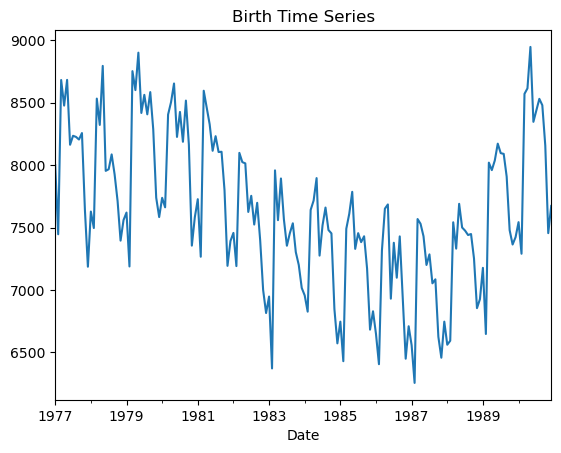

In [26]:
birth_ts.plot()
plt.title('Birth Time Series')

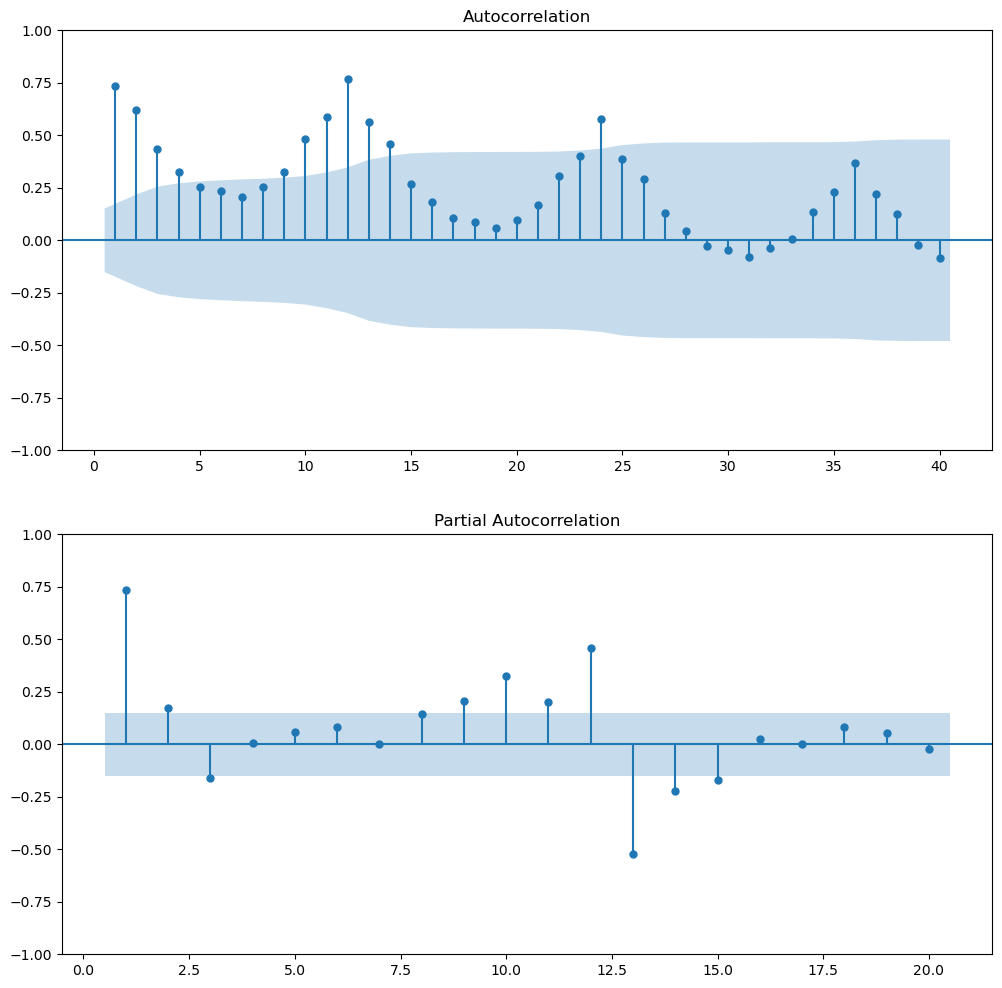

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(birth_ts, ax=ax1, zero=False, lags=40)
plot_pacf(birth_ts, ax=ax2, zero=False, lags=20)
plt.show()

In [28]:
sm.stats.acorr_ljungbox(birth_ts, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,310.84176,7.918528e-61


In [31]:
adfuller(birth_ts, regression='c')

(-1.4809688441573332,
 0.5429038973343864,
 14,
 153,
 {'1%': -3.473829775724492,
  '5%': -2.880622899711496,
  '10%': -2.5769448985432954},
 2099.987876598859)

In [33]:
birth_df2 = birth_df.drop(index=0)
birth_df2['birth_diff'] = np.diff(birth_df['Num_Births'], n=1)
birth_df2 = birth_df2.drop(columns=['Num_Births'])
birth_df2.head()

,Date,Month,Year,birth_diff
1,1977-01-02,1,1977,33
2,1977-01-03,1,1977,33
3,1977-01-04,1,1977,-18
4,1977-01-05,1,1977,38
5,1977-01-06,1,1977,-13


In [35]:
birth_per_month = birth_df2.groupby(['Year', 'Month'])['birth_diff'].sum().reset_index()
birth_per_month.head()

,Year,Month,birth_diff
0,1977,1,55
1,1977,2,27
2,1977,3,18
3,1977,4,-60
4,1977,5,5


In [36]:
birth_per_month['Date'] = pd.to_datetime(birth_per_month['Year'].astype(str) + '-' + birth_per_month['Month'].astype(str), 
                                        format='%Y-%m')
birth_per_month.head()

,Year,Month,birth_diff,Date
0,1977,1,55,1977-01-01
1,1977,2,27,1977-02-01
2,1977,3,18,1977-03-01
3,1977,4,-60,1977-04-01
4,1977,5,5,1977-05-01


In [38]:
birth_ts2 = pd.Series(birth_per_month['birth_diff'].values, index=birth_per_month['Date'])
birth_ts2.index.freq = 'MS'
birth_ts2

Date
1977-01-01    55
1977-02-01    27
1977-03-01    18
1977-04-01   -60
1977-05-01     5
              ..
1990-08-01    -4
1990-09-01   -45
1990-10-01    17
1990-11-01   -14
1990-12-01   -42
Freq: MS, Length: 168, dtype: int64

Text(0.5, 1.0, 'Birth Time Series First Difference')

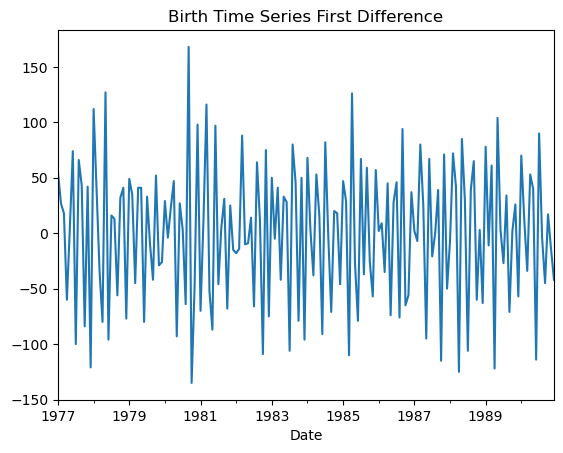

In [40]:
birth_ts2.plot()
plt.title('Birth Time Series First Difference')

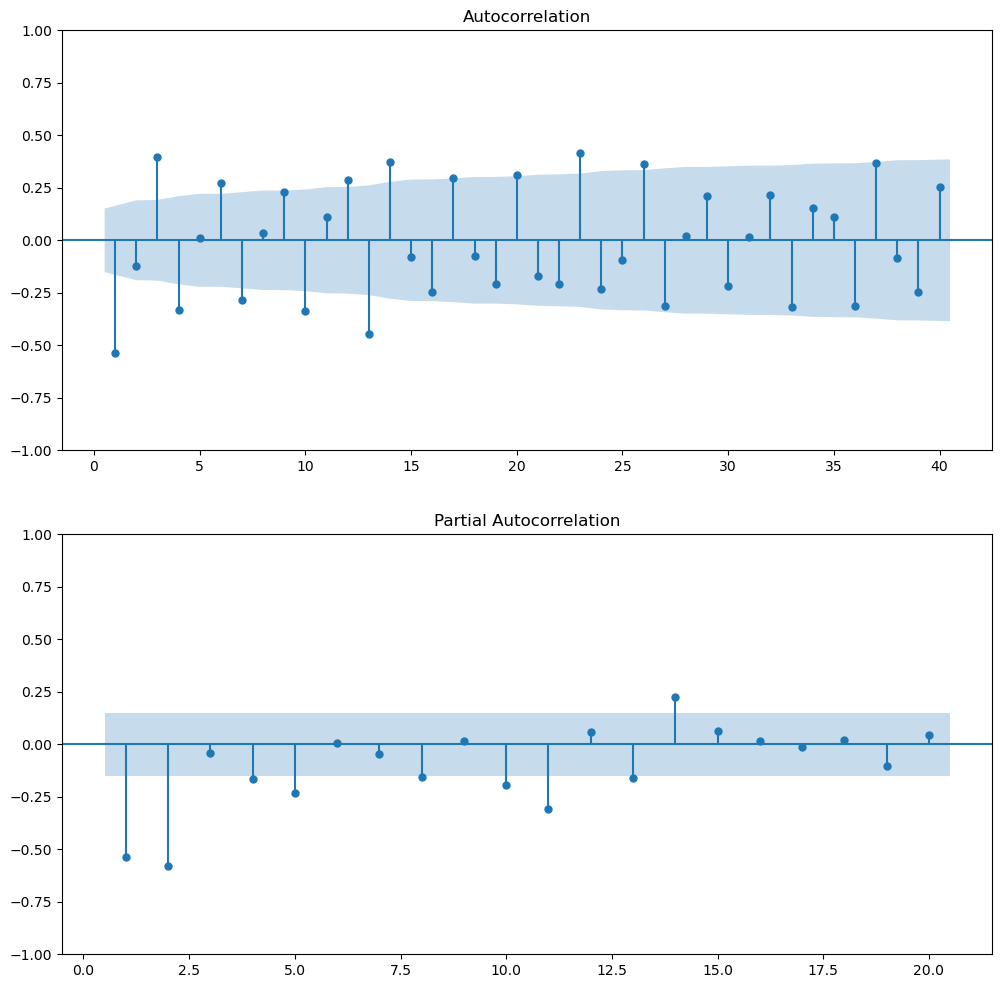

In [41]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(birth_ts2, ax=ax1, zero=False, lags=40)
plot_pacf(birth_ts2, ax=ax2, zero=False, lags=20)
plt.show()

In [42]:
sm.stats.acorr_ljungbox(birth_ts2, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,156.522032,1.690914e-28


In [43]:
adfuller(birth_ts2, regression='c')

(-5.9982610324097,
 1.68122866383181e-07,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1518.5544872788319)

In [54]:
fit_ar = ARIMA(birth_ts2, order=(3,1,4)).fit()

print(fit_ar.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  168
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -835.006
Date:                Sun, 06 Oct 2024   AIC                           1686.012
Time:                        18:48:37   BIC                           1710.956
Sample:                    01-01-1977   HQIC                          1696.136
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2606      0.092    -13.655      0.000      -1.442      -1.080
ar.L2         -1.1195      0.106    -10.548      0.000      -1.328      -0.912
ar.L3         -0.1065      0.093     -1.141      0.2

c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
